<span style = "color:green">Setup Start</span>

In [38]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2648521034432232461
xla_global_id: -1
]


In [39]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt

In [40]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [41]:
cpus = tf.config.experimental.list_physical_devices('CPU')
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [42]:
datadirect = 'Data'

<span style="color:green"> SETUP  FINISH </span>

<span style ="color :red">REMOVING IN ACCESSIBLKE IMAGES</span>    

In [43]:
os.listdir(datadirect)

['Happy', 'Sad']

In [44]:
imgext = ['jpeg' , 'jpg' , 'bmp' , 'png']
imgext

['jpeg', 'jpg', 'bmp', 'png']

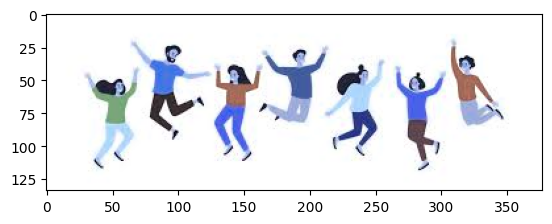

In [45]:
readingstuff = cv2.imread(os.path.join('Data','Happy','tester.jpeg'))
plt.imshow(readingstuff)

In [46]:
print("beginning image removcal")
for imgclass in os.listdir(datadirect):
    for img in os.listdir(os.path.join(datadirect,imgclass)):
        imgpath = os.path.join(datadirect , imgclass , img)
        try:
            img = cv2.imread(imgpath)
            tip = imghdr.what(imgpath)
            if tip not in imgext:
                print('removing image'.format(imgpath))
                os.remove(imgpath)
        except Exception as e:
            print("excetion occured! with image : " .format(imgpath))        

beginning image removcal


<span style="color:red">DONE REMOVING TRASH IMAGES</span>

<span style="color: violet">STARTIG TO LOAD DATA/BATCHES</span>

In [47]:
import numpy as np

In [48]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [49]:
imgdata = tf.keras.utils.image_dataset_from_directory('Data') 
imgdata

Found 243 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [50]:
dataiteration = imgdata.as_numpy_iterator()
imgbatch = dataiteration.next()

In [51]:
imgbatch[0]

array([[[[6.00371094e+01, 1.21037109e+02, 1.86037109e+02],
         [6.12226562e+01, 1.22222656e+02, 1.87222656e+02],
         [6.33710938e+01, 1.24371094e+02, 1.89371094e+02],
         ...,
         [7.58554688e+01, 1.41113281e+02, 2.02113281e+02],
         [7.04453125e+01, 1.38222656e+02, 2.01000000e+02],
         [6.71113281e+01, 1.35111328e+02, 1.98111328e+02]],

        [[6.06093750e+01, 1.21609375e+02, 1.86609375e+02],
         [6.17949219e+01, 1.22794922e+02, 1.87794922e+02],
         [6.39433594e+01, 1.24943359e+02, 1.89943359e+02],
         ...,
         [7.68938141e+01, 1.42151627e+02, 2.02939270e+02],
         [7.10812836e+01, 1.38858627e+02, 2.01635971e+02],
         [6.76835938e+01, 1.35683594e+02, 1.98683594e+02]],

        [[6.13242188e+01, 1.22324219e+02, 1.87324219e+02],
         [6.25097656e+01, 1.23509766e+02, 1.88445831e+02],
         [6.47114716e+01, 1.25711472e+02, 1.90137253e+02],
         ...,
         [7.85312500e+01, 1.43321381e+02, 2.04184128e+02],
         [

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


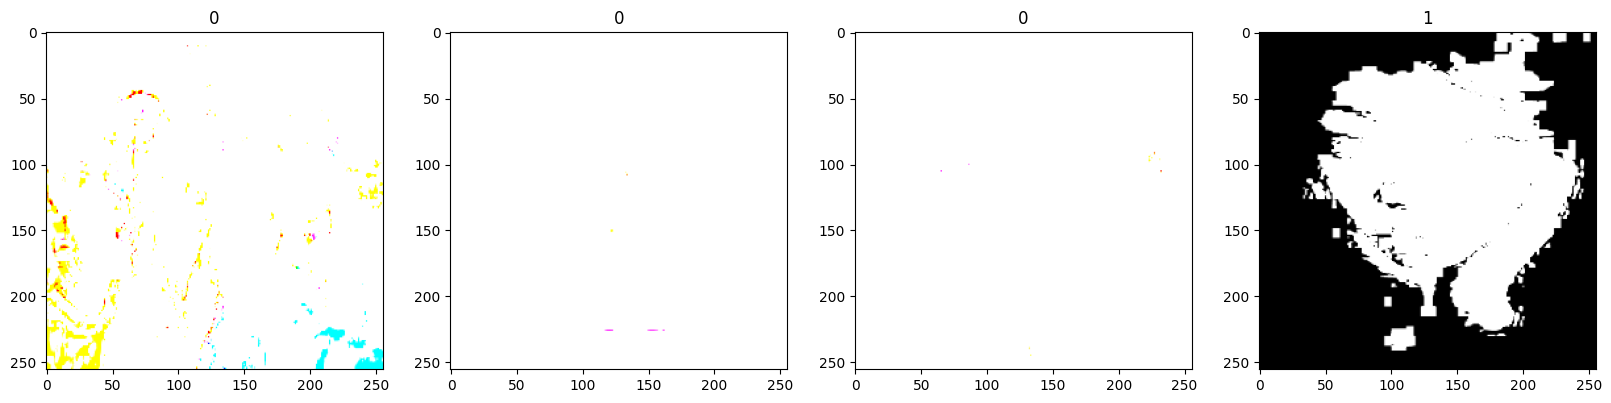

In [52]:
fig, ax =plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(imgbatch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(imgbatch[1][idx])

<span style = "color : violet"> DONE LOADING AND CDREATING BATCHES OF DATA</span>

<SPAN style ="color:orange">SCaling and spliting data</snap>

In [53]:
imgdata = imgdata.map(lambda x,y: (x/255,y))


In [54]:
scalingiterator = imgdata.as_numpy_iterator()

In [55]:
imgbatch = scalingiterator.next()

In [56]:
imgbatch[0].max()

1.0

<snap style="color:orange">DONE SCALING AND ADJUSING BATCHES</snap>

<snap style="color:orange">SPLITTING DATA***** </snap >

In [57]:
len(imgdata)

8

In [58]:
trainnum = 5
valnum = 2
testnum = 1

In [59]:
trainbatch= imgdata.take(trainnum)
valbatch = imgdata.skip(trainnum).take(valnum)
testbatch = imgdata.skip(trainnum + valnum).take(testnum)

In [60]:
len(trainbatch)

5

<snap style="color:orange">*****DONE SPLITTING </snap>

<snap style="color:skyblue">MODEL SETUP AND TRAINING </snap>

In [61]:
from tensorflow.keras.models import Sequential
from keras.layers import Convolution2D as Conv2D 
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [62]:
Model = Sequential()

In [63]:
Conv2D??

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.Conv2D", "keras.layers.Convolution2D")
class Conv2D(Conv):
    """2D convolution layer (e.g. spatial convolution over images).

    This layer creates a convolution kernel that is convolved
    with the layer input to produce a tensor of
    outputs. If `use_bias` is True,
    a bias vector is created and added to the outputs. Finally, if
    `activation` is not `None`, it is applied to the outputs as well.

    When using this layer as the first layer in a model,
    provide the keyword argument `input_shape`
    (tuple of i

In [64]:
Model.add(Conv2D(16, (3,3) , 1 ,activation = 'relu', input_shape = (256,256,3)))
Model.add(MaxPooling2D())

Model.add(Conv2D(32,(3,3),1,activation = 'relu'))
Model.add(MaxPooling2D())

Model.add(Conv2D(16,(3,3),1,activation = 'relu'))
Model.add(MaxPooling2D())

Model.add(Flatten())\

Model.add(Dense(256,activation = 'relu'))

Model.add(Dense(1,activation = 'sigmoid'))

In [65]:
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [66]:
logdir = 'Logs'

In [67]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [68]:
Model.compile(optimizer= 'adam' , loss= tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [69]:

history = Model.fit(trainbatch , epochs = 30 , validation_data= valbatch, callbacks = [tensorboard_callback])

Epoch 1/30


5/5 [==============================] - 4s 549ms/step - loss: 0.9357 - accuracy: 0.4187 - val_loss: 0.6365 - val_accuracy: 0.7031
Epoch 2/30
5/5 [==============================] - 3s 495ms/step - loss: 0.6241 - accuracy: 0.5938 - val_loss: 0.5669 - val_accuracy: 0.8281
Epoch 3/30
5/5 [==============================] - 3s 489ms/step - loss: 0.6028 - accuracy: 0.7063 - val_loss: 0.5622 - val_accuracy: 0.7500
Epoch 4/30
5/5 [==============================] - 2s 484ms/step - loss: 0.5088 - accuracy: 0.7437 - val_loss: 0.3689 - val_accuracy: 0.8906
Epoch 5/30
5/5 [==============================] - 2s 486ms/step - loss: 0.4396 - accuracy: 0.8500 - val_loss: 0.3943 - val_accuracy: 0.8438
Epoch 6/30
5/5 [==============================] - 2s 490ms/step - loss: 0.3849 - accuracy: 0.8438 - val_loss: 0.3542 - val_accuracy: 0.8594
Epoch 7/30
5/5 [==============================] - 3s 490ms/step - loss: 0.3627 - accuracy: 0.8313 - val_loss: 0.3642 - val_accuracy: 0.8750
Epoch 8/30
5/5 [===============

In [70]:
history.history

{'loss': [0.9357102513313293,
  0.6241378784179688,
  0.6027560830116272,
  0.5087891221046448,
  0.43961548805236816,
  0.3849490284919739,
  0.36269521713256836,
  0.3590357005596161,
  0.3268284797668457,
  0.24969306588172913,
  0.2227025032043457,
  0.16141781210899353,
  0.16253390908241272,
  0.09847644716501236,
  0.03797832131385803,
  0.04285360872745514,
  0.039233215153217316,
  0.026083046570420265,
  0.016536591574549675,
  0.01282116211950779,
  0.027459248900413513,
  0.029550042003393173,
  0.013681580312550068,
  0.022800371050834656,
  0.008152822032570839,
  0.013247179798781872,
  0.002642085775732994,
  0.0037662475369870663,
  0.001372247003018856,
  0.004486409947276115],
 'accuracy': [0.41874998807907104,
  0.59375,
  0.706250011920929,
  0.7437499761581421,
  0.8500000238418579,
  0.84375,
  0.831250011920929,
  0.8999999761581421,
  0.856249988079071,
  0.9125000238418579,
  0.8999999761581421,
  0.9437500238418579,
  0.925000011920929,
  0.981249988079071,
 

<snap style="color:skyblue">TRAINING COMPLETE</snap>

<scan style="color : cyan"> TESTING MODEL </scan>

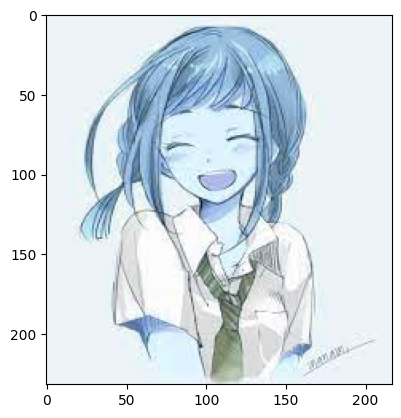

In [71]:
testimg = cv2.imread('Untitled.jpg')
plt.imshow(testimg)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

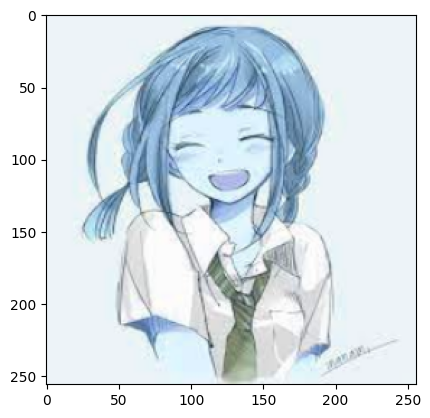

In [72]:
#resizing image\
testimage = tf.image.resize(testimg,(256,256))
plt.imshow(testimage.numpy().astype(int))
plt.show

In [73]:
np.expand_dims(testimage,0).shape

(1, 256, 256, 3)

In [74]:
testhat = Model.predict(np.expand_dims(testimage/255,0))

1/1 [==============================] - 0s 151ms/step


In [75]:
testhat

array([[0.02652845]], dtype=float32)

In [76]:
from tensorflow.keras.models import load_model

In [77]:
Model.save(os.path.join('Model','binarymodel.h5'))

c:\ZPartition\ProgrammingNCoding\Anacondaaa\envs\tf\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
modelload = load_model(os.path.join('Model','binarymodel.h5'))

In [79]:
modelload.predict(np.expand_dims(testimage/255,0))

1/1 [==============================] - 0s 95ms/step


array([[0.02652845]], dtype=float32)

In [80]:
if testhat < 0.5:
    print('person is HAPPY!')
else :
    print('person is sad')    

person is HAPPY!
